<a href="https://colab.research.google.com/github/AugustinCablant/Viager/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# imports

import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Stage')
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.cluster import dbscan
import matplotlib.pyplot as plt
import random
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('data_tetes_back_match.csv')
print(list(df.columns))

['Unnamed: 0.1', 'Unnamed: 0', 'b_sexe', 'bcode', 'b_ville', 'b_pays', 'dcode', 'acte', 'b_nom', 'b_prenoms', 'b_annee', 'b_mois', 'b_jour', 'b_dep', 'd_annee', 'd_mois', 'd_jour', 'd_dep', 'fichier', 'match5', 'annee', 'a_prenom', 'a_nom', 'a_sexe', 'a_jour', 'a_mois', 'a_annee', 'a_dep', 'a_ville', 'id', 'match', 'm2', 'manual', 'aa_ville', 'nba_ville', 'aa_ville1', 'aa_ville2', 'aa_ville3', 'aa_ville4', 'aa_ville5', 'pctville', 'nba_prenoms', 'a_prenoms1', 'a_prenoms2', 'a_prenoms3', 'a_prenoms4', 'a_prenoms5', 'a_prenoms6', 'pctprenoms', 'c_sexe', 'c_nom', 'c_prenoms', 'c_annee', 'c_mois', 'c_jour', 'c_dep', 'c_ville', 'commun', 'oldmatch', 'adresse_bien_vendu', 'prenom_vendeur_1', 'nom_vendeur_1', 'nom_vendeur_2', 'nom_acheteur_2', 'type_de_viager', 'majoration', 'bouquet', 'rente', 'tete_1', 'tete_2', 'commission', 'milliemes', 'standing', 'remarques', 'valeur_libre', 'valeur_occupee', 'numero', 'repertoire', 'prenom_vendeur_2', 'date_naissance_vendeur_1', 'ville_naissance_vendeu

In [30]:
df_travail = df[['id','acte','dateN','dateA','dateD','age_acte','age_deces','Td','Ts','type_de_viager','majoration','bouquet','rente','euro','franc','downp','annuity']]

X = df[['annuity','downp','type_de_viager']].dropna()

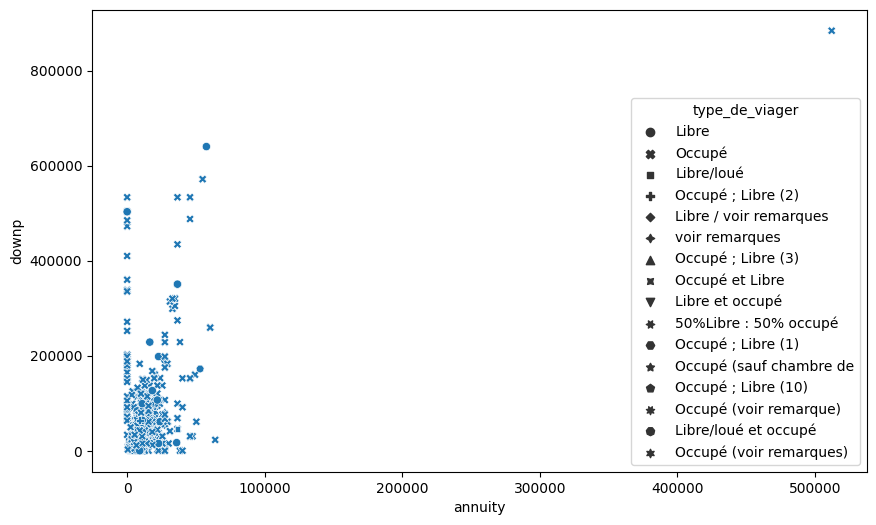

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = 'annuity',y = 'downp', data = X, style = 'type_de_viager')
plt.xlabel('annuity')
plt.ylabel('downp')
plt.show()

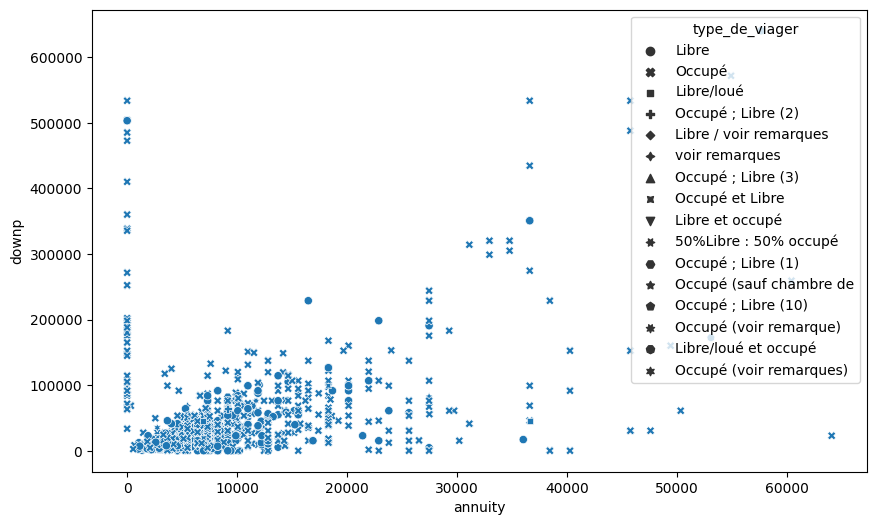

In [35]:
# Managing outliers

Q05 = X['annuity'].quantile(0.05)
Q95 = X['annuity'].quantile(0.95)

IQR = Q95 - Q05

# outliers
seuil_inf = Q05 - 1.5 * IQR
seuil_sup = Q95 + 1.5 * IQR

# Delete extreme values
X = X[(X['annuity'] >= seuil_inf) & (X['annuity'] <= seuil_sup)]


fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = 'annuity',y = 'downp', data = X, style = 'type_de_viager')
plt.xlabel('annuity')
plt.ylabel('downp')
plt.show()

Here is an example with a random number of clusters ...

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='annuity', ylabel='downp'>

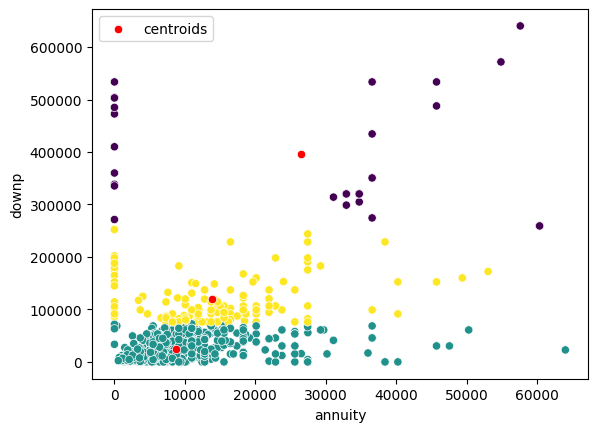

In [45]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter=10000)
model.fit(X[['annuity','downp']])
sns.scatterplot(x = 'annuity',y = 'downp', data = X[['annuity','downp']], c= model.predict(X[['annuity','downp']]))
sns.scatterplot(x = model.cluster_centers_[:,0],y = model.cluster_centers_[:,1], c = 'red', label = 'centroids')

In [46]:
print("The inertia of the model is : ", model.inertia_, "it's the sum of the distance between a point and its centroid")

The inertia of the model is :  968401545536.8635 it's the sum of the distance between a point and its centroid


The inertia is huge, it's not optimal to chose randomly this number of clusters. Let's try to improve our model ! <br> For that, we are going to use the "elbow method".

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist

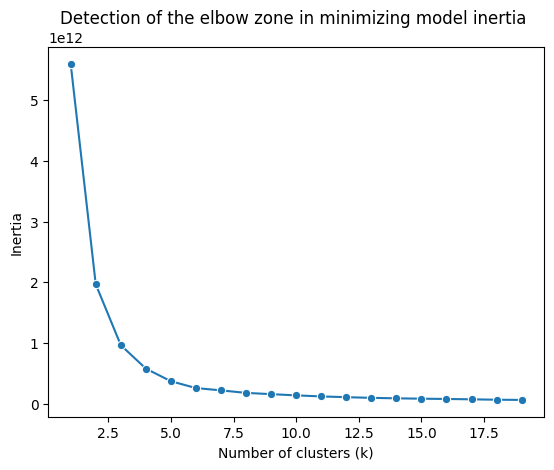

In [49]:
inertia = []
k_range = range(1,20)

for k in tqdm(k_range):
  model = model = KMeans(n_clusters = k, init = 'k-means++', max_iter=10000)
  model.fit(X[['annuity','downp']])
  inertia.append(model.inertia_)

sns.lineplot(x=k_range, y=inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Detection of the elbow zone in minimizing model inertia ')
plt.show()

Thus, the optimal number of clusters should be 4 or 5.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


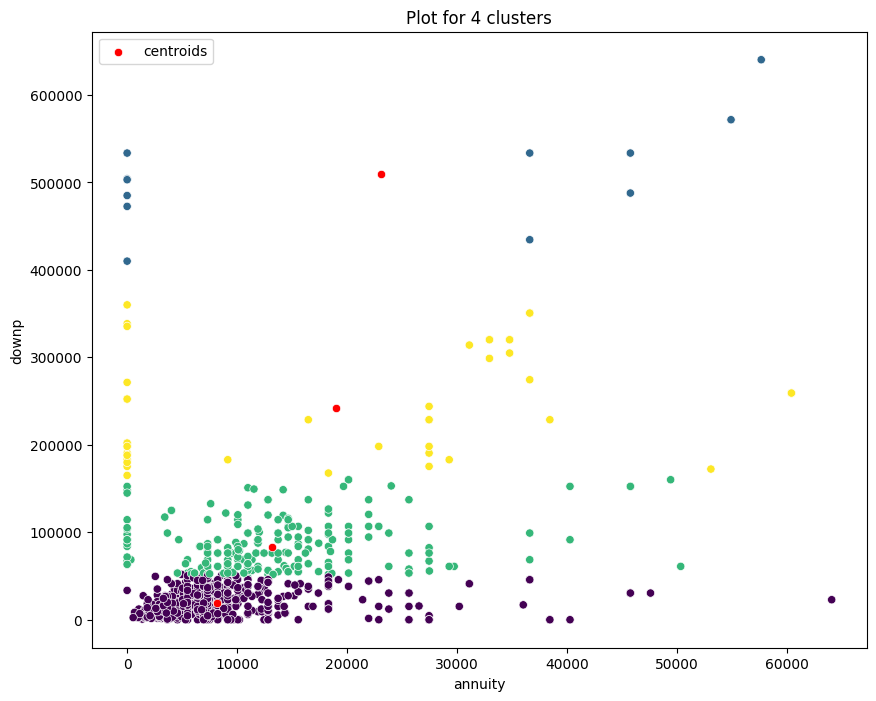

In [67]:
model1 = KMeans(n_clusters = 4, init = 'k-means++', max_iter=10000)

model1.fit(X[['annuity','downp']])


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

sns.scatterplot(x = 'annuity',y = 'downp', data = X[['annuity','downp']], c= model1.predict(X[['annuity','downp']]))
sns.scatterplot(x = model1.cluster_centers_[:,0],y = model1.cluster_centers_[:,1], c = 'red', label = 'centroids')

plt.title('Plot for 4 clusters')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


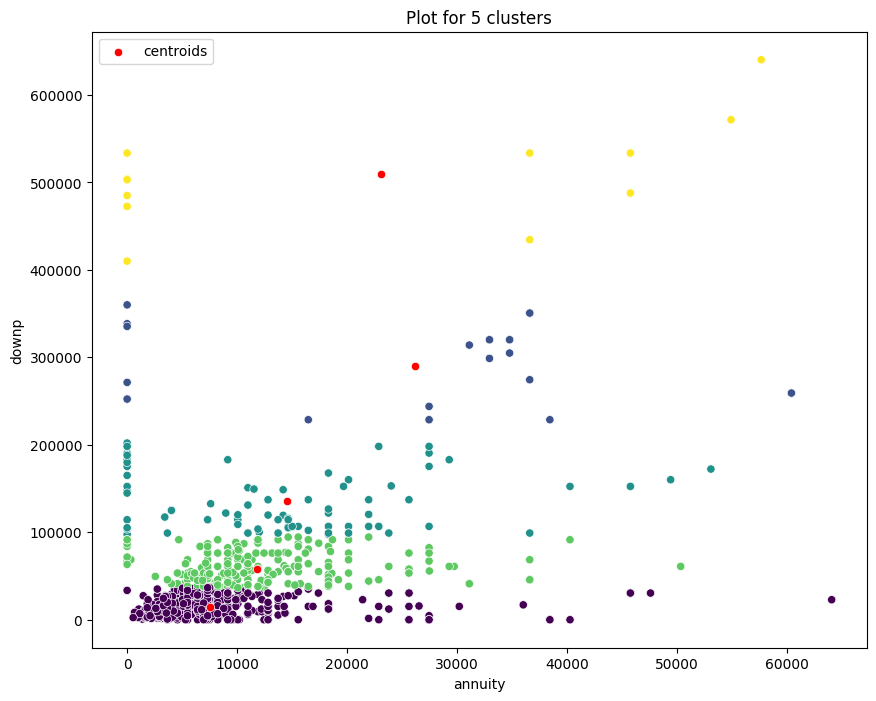

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
model2 = KMeans(n_clusters = 5, init = 'k-means++', max_iter=10000)

model2.fit(X[['annuity','downp']])

sns.scatterplot(x = 'annuity',y = 'downp', data = X[['annuity','downp']], c= model2.predict(X[['annuity','downp']]))
sns.scatterplot(x = model2.cluster_centers_[:,0],y = model2.cluster_centers_[:,1], c = 'red', label = 'centroids')
plt.title('Plot for 5 clusters')

plt.show()